In [1]:
import importlib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sys
import time
sys.path.append('../../')


from astroLuSt.monitoring import (
    errorlogging as alme,
    errortesting as almet,
    formatting as almf,
    timers as almt,
)



# LogErrors

In [ ]:
from joblib import Parallel, delayed
importlib.reload(alme)

def subfunc(idx):
    n = np.random.choice(range(3), size=1)
    try:
        if n==0:
            almet.raise_concaterr(n)
        elif n == 1:
            almet.raise_div0()
        elif n == 2:
            almet.raise_nested_exception()
    except Exception as e:
        LE.print_exc(e, prefix='Pre', suffix=f'Suf{n}')
        df_le_temp = LE.exc2df(e, prefix='Pre', suffix=f'Suf{idx}', store=True)
            



x = pd.DataFrame(
    columns=['a', 'b'],
#      data=[[1,2],[2,3]]
)

LE = alme.LogErrors(verbose=0)


_ = Parallel(n_jobs=5, backend='threading')(delayed(subfunc)(idx=idx) for idx in range(5))
    

# print(LE.df_errorlog['exception'].iloc[0])
LE.df_errorlog


/home/lukas/github/astroLuSt/demos/../astroLuSt/monitoring/errorlogging.py:277: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_temp.index = [idx]*df_temp.shape[0]


,exception,prefix,suffix,file,line,problem_line,error_message,time,squeezed
0,"Traceback (most recent call last):\n File ""/h...",Pre,Suf1,/home/lukas/github/astroLuSt/demos/../astroLuS...,13,raise ValueError('custom error'),ValueError: custom error in except in except,2024-01-08 08:46:11.346035,False
0,"Traceback (most recent call last):\n File ""/h...",Pre,Suf1,/home/lukas/github/astroLuSt/demos/../astroLuS...,17,raise ValueError('custom error in except'),ValueError: custom error in except in except,2024-01-08 08:46:11.346035,False
0,"Traceback (most recent call last):\n File ""/h...",Pre,Suf1,/tmp/ipykernel_86853/1178136544.py,13,almet.raise_nested_exception(),ValueError: custom error in except in except,2024-01-08 08:46:11.346035,False
0,"Traceback (most recent call last):\n File ""/h...",Pre,Suf1,/home/lukas/github/astroLuSt/demos/../astroLuS...,19,raise ValueError('custom error in except in ex...,ValueError: custom error in except in except,2024-01-08 08:46:11.346035,False
1,"Traceback (most recent call last):\n File ""/t...",Pre,Suf2,/tmp/ipykernel_86853/1178136544.py,11,almet.raise_div0(),ZeroDivisionError: division by zero,2024-01-08 08:46:11.349025,False
1,"Traceback (most recent call last):\n File ""/t...",Pre,Suf2,/home/lukas/github/astroLuSt/demos/../astroLuS...,5,return 1/0,ZeroDivisionError: division by zero,2024-01-08 08:46:11.349025,False
2,"Traceback (most recent call last):\n File ""/h...",Pre,Suf3,/home/lukas/github/astroLuSt/demos/../astroLuS...,13,raise ValueError('custom error'),ValueError: custom error in except in except,2024-01-08 08:46:11.351537,False
2,"Traceback (most recent call last):\n File ""/h...",Pre,Suf3,/home/lukas/github/astroLuSt/demos/../astroLuS...,17,raise ValueError('custom error in except'),ValueError: custom error in except in except,2024-01-08 08:46:11.351537,False
2,"Traceback (most recent call last):\n File ""/h...",Pre,Suf3,/tmp/ipykernel_86853/1178136544.py,13,almet.raise_nested_exception(),ValueError: custom error in except in except,2024-01-08 08:46:11.351537,False
2,"Traceback (most recent call last):\n File ""/h...",Pre,Suf3,/home/lukas/github/astroLuSt/demos/../astroLuS...,19,raise ValueError('custom error in except in ex...,ValueError: custom error in except in except,2024-01-08 08:46:11.351537,False


# ExecTimer

## Standard Usage

In [2]:


importlib.reload(almt)

ET = almt.ExecTimer(verbose=1)

ET.checkpoint_start('Sup Task', comment='Global Task')

ET.checkpoint_start('Sub Task1')
time.sleep(2)
ET.checkpoint_end('Sub Task1')
ET.checkpoint_start('Sub Task2')
time.sleep(3)
ET.checkpoint_end('Sub Task2', comment='TEST')

ET.checkpoint_end('Sup Task')

ET.estimate_runtime('Sup Task', nrepeats=4, ndone=1)

ET.df_protocoll



######################################################################
INFO: Started Sup Task at 2024-02-09T07:18:47

######################################################################
INFO: Started Sub Task1 at 2024-02-09T07:18:47

INFO: Finished Sub Task1 at 2024-02-09T07:18:49
Required time: 0 days 00:00:02
######################################################################

######################################################################
INFO: Started Sub Task2 at 2024-02-09T07:18:49

INFO: Finished Sub Task2 at 2024-02-09T07:18:52
Required time: 0 days 00:00:03
######################################################################

INFO: Finished Sup Task at 2024-02-09T07:18:52
Required time: 0 days 00:00:05
######################################################################
INFO: Total estimated runtime for 4 repeats: 20000000000 nanoseconds


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
0,Sup Task,2024-02-09 07:18:47,2024-02-09 07:18:52,0 days 00:00:05,1.707463e+09,1.707463e+09,5.025336,Global Task,
1,Sub Task1,2024-02-09 07:18:47,2024-02-09 07:18:49,0 days 00:00:02,1.707463e+09,1.707463e+09,2.005517,,
2,Sub Task2,2024-02-09 07:18:49,2024-02-09 07:18:52,0 days 00:00:03,1.707463e+09,1.707463e+09,3.007027,,TEST


## Usage to have an up-to-date estimate of runtimes

In [7]:

#initialize the timer
ET = almt.ExecTimer(verbose=0)

repeats = 5 #number of times to repeat the loop


#Execute some loop
ET.checkpoint_start('Global Task')  #to monitor total (actual) duration
for idx in range(repeats):

    #monitor duration of each loop-execution
    ET.checkpoint_start(f'Subtask{idx}')

    #generate random sleeptime (should average out to be 1)
    time.sleep(np.random.normal(1, 0.5, size=1)[0])
    
    ET.checkpoint_end(f'Subtask{idx}')

    #estimate the runtime from the current point of view
    ET.estimate_runtime(r'Subtask', repeats, idx+1)

ET.checkpoint_end('Global Task')

ET.df_protocoll

INFO: Total estimated runtime for 5 repeats: 5000000000 nanoseconds
INFO: Total estimated runtime for 5 repeats: 5000000000 nanoseconds
INFO: Total estimated runtime for 5 repeats: 3333333333 nanoseconds
INFO: Total estimated runtime for 5 repeats: 3750000000 nanoseconds
INFO: Total estimated runtime for 5 repeats: 5000000000 nanoseconds


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
0,Global Task,2024-01-15 19:33:12,2024-01-15 19:33:17,0 days 00:00:05,1.705347e+09,1.705347e+09,4.723630,,
1,Subtask0,2024-01-15 19:33:12,2024-01-15 19:33:13,0 days 00:00:01,1.705347e+09,1.705347e+09,1.241117,,
2,Subtask1,2024-01-15 19:33:13,2024-01-15 19:33:14,0 days 00:00:01,1.705347e+09,1.705347e+09,0.447838,,
3,Subtask2,2024-01-15 19:33:14,2024-01-15 19:33:14,0 days 00:00:00,1.705347e+09,1.705347e+09,0.769977,,
4,Subtask3,2024-01-15 19:33:14,2024-01-15 19:33:15,0 days 00:00:01,1.705347e+09,1.705347e+09,1.100741,,
5,Subtask4,2024-01-15 19:33:15,2024-01-15 19:33:17,0 days 00:00:02,1.705347e+09,1.705347e+09,1.139359,,


## Usage as decorator

### Timing one function

In [8]:
ET.verbose = 1
@ET.time_exec(start_kwargs={'comment':'timed_func'})
def timed_func():
    time.sleep(np.random.rand())
    return 'FINISHED'
tf = timed_func()



######################################################################
INFO: Started Decorator Task at 2024-01-15T19:33:22

INFO: Finished Decorator Task at 2024-01-15T19:33:22
Required time: 0 days 00:00:00
######################################################################


### Getting execution statistics

/home/lukas/github/astroLuSt/demos/../astroLuSt/monitoring/timers.py:440: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xlabel('Elapsed Time [s]')


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
7,get_execstats(),2024-01-15 19:33:27,2024-01-15 19:33:28,0 days 00:00:01,1.705347e+09,1.705347e+09,0.852952,__get_execstats()__,__get_execstats()__
8,get_execstats()1,2024-01-15 19:33:28,2024-01-15 19:33:29,0 days 00:00:01,1.705347e+09,1.705347e+09,0.782487,__get_execstats()__,__get_execstats()__
9,get_execstats()2,2024-01-15 19:33:29,2024-01-15 19:33:29,0 days 00:00:00,1.705347e+09,1.705347e+09,0.448781,__get_execstats()__,__get_execstats()__
10,get_execstats()3,2024-01-15 19:33:29,2024-01-15 19:33:30,0 days 00:00:01,1.705347e+09,1.705347e+09,0.358226,__get_execstats()__,__get_execstats()__
11,get_execstats()4,2024-01-15 19:33:30,2024-01-15 19:33:31,0 days 00:00:01,1.705347e+09,1.705347e+09,0.736886,__get_execstats()__,__get_execstats()__
12,get_execstats()5,2024-01-15 19:33:31,2024-01-15 19:33:31,0 days 00:00:00,1.705347e+09,1.705347e+09,0.740703,__get_execstats()__,__get_execstats()__
13,get_execstats()6,2024-01-15 19:33:31,2024-01-15 19:33:32,0 days 00:00:01,1.705347e+09,1.705347e+09,0.252039,__get_execstats()__,__get_execstats()__
14,get_execstats()7,2024-01-15 19:33:32,2024-01-15 19:33:32,0 days 00:00:00,1.705347e+09,1.705347e+09,0.542717,__get_execstats()__,__get_execstats()__
15,get_execstats()8,2024-01-15 19:33:32,2024-01-15 19:33:33,0 days 00:00:01,1.705347e+09,1.705347e+09,0.973045,__get_execstats()__,__get_execstats()__
16,get_execstats()9,2024-01-15 19:33:33,2024-01-15 19:33:34,0 days 00:00:01,1.705347e+09,1.705347e+09,0.991502,__get_execstats()__,__get_execstats()__


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
0,Global Task,2024-01-15 19:33:12,2024-01-15 19:33:17,0 days 00:00:05,1.705347e+09,1.705347e+09,4.723630,,
1,Subtask0,2024-01-15 19:33:12,2024-01-15 19:33:13,0 days 00:00:01,1.705347e+09,1.705347e+09,1.241117,,
2,Subtask1,2024-01-15 19:33:13,2024-01-15 19:33:14,0 days 00:00:01,1.705347e+09,1.705347e+09,0.447838,,
3,Subtask2,2024-01-15 19:33:14,2024-01-15 19:33:14,0 days 00:00:00,1.705347e+09,1.705347e+09,0.769977,,
4,Subtask3,2024-01-15 19:33:14,2024-01-15 19:33:15,0 days 00:00:01,1.705347e+09,1.705347e+09,1.100741,,
5,Subtask4,2024-01-15 19:33:15,2024-01-15 19:33:17,0 days 00:00:02,1.705347e+09,1.705347e+09,1.139359,,
6,Decorator Task,2024-01-15 19:33:22,2024-01-15 19:33:22,0 days 00:00:00,1.705347e+09,1.705347e+09,0.004396,timed_func,


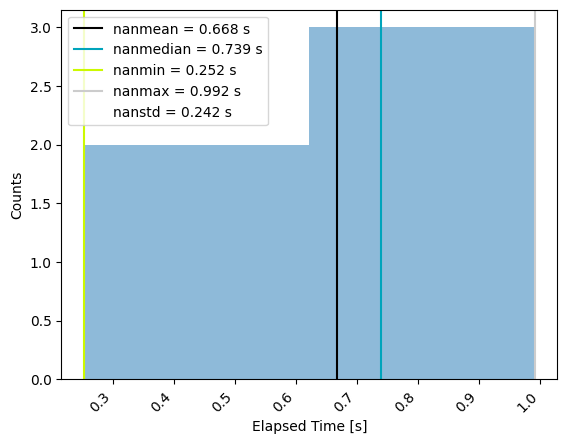

In [9]:
ET.verbose = 0
@ET.get_execstats(n=10, metrics=None, drop_from_df_protocoll=True)
def evaluated_func():
    time.sleep(np.random.rand())
        
    return 'FINISHED'



ef, fig = evaluated_func()

display(ef)

display(ET.df_protocoll)



# Formatted Printing

In [ ]:
importlib.reload(almf)
verbose = 3

for level in range(3):
    almf.printf(
        msg=f'info at level {level}',
        type='INFO',
        level=level,
        start=4*' ',
        verbose=verbose
    )